In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Сгенерируем выборку из стандартного нормального распределения рамзера $N = 100$.

In [24]:
N = 100
norm_rv = sts.norm()
sample = norm_rv.rvs(N)

Для каждого $n \leqslant 100$ в модели $N(0, \theta)$ найдем оценку максимального правдоподобия, равную $\overline{X^2}$, а также байесовкую оценку, для которой в качестве априорного распределения возьмем сопряженное. В данном случае, сопряженное распределение - это обратное гамма-распределение с параметрами $\alpha$ и $\beta$. Апостериорное распределение является обратным гамма-распределением с параметрами $\alpha + \frac{n}{2}$ и $\beta + \frac{\sum_{i=1}^n X_i^2}{2}$. Матожидание по апостериорной плотности, а соответственно и байесовская оценка параметра $\theta$, равняется $\frac{\beta + \frac{\sum_{i=1}^n X_i^2}{2}}{\alpha + \frac{n}{2} - 1}$. Рассмотрим несколько значений параметров $\alpha$  и $\beta$ и нарисуем график зависимости модуля ошибки от размера выборки для каждой оценки, включая и оценку максимального правдоподобия.

In [25]:
def create_plot(sample):
    plt.figure(figsize=(12, 6))

    max_likelihood = np.zeros(N)

    params = [(1, 2), (1, 4), (2, 0.5), (3, 1), (6, 2)]
    bayes_estimators = np.zeros(N)

    for n in range(1, N + 1):
        max_likelihood[n - 1] = np.mean(sample[:n] ** 2)
    plt.plot(range(1, N + 1), abs(1 - max_likelihood), label="likelihood")

    for param in params:
        a, b = param
        for n in range(1, N + 1):
            bayes_estimators[n - 1] = (b + sum(sample[:n] ** 2) / 2) \
                                / (a + n / 2 - 1)
        plt.plot(range(1, N + 1), abs(1 - bayes_estimators), 
            label=r"bayes $\alpha$ = {}, $\beta$ = {}".format(a, b))

    plt.title(r"""График зависимости модуля разности оценки и истинного
    значения $\theta = 1$ от рамзера выборки""")
    plt.xlabel(r"n")
    plt.ylabel(r"|$\theta$ - $\hat{\theta}$|")
    plt.ylim(0, 0.4)
    plt.legend(loc="best")
    plt.show();

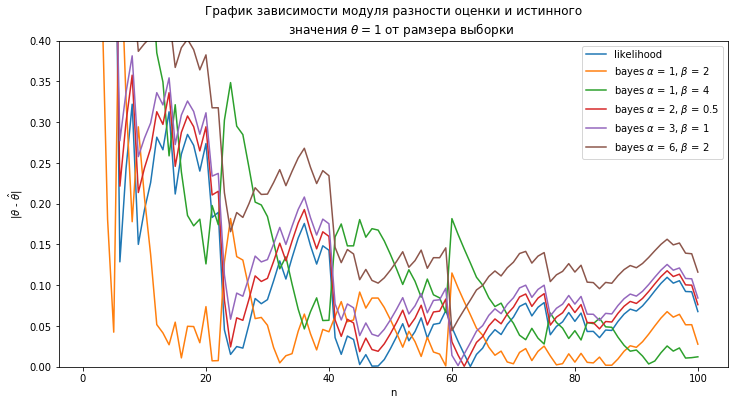

In [26]:
create_plot(sample)

Сгенерируем еще одну выборку размера $N = 100$.

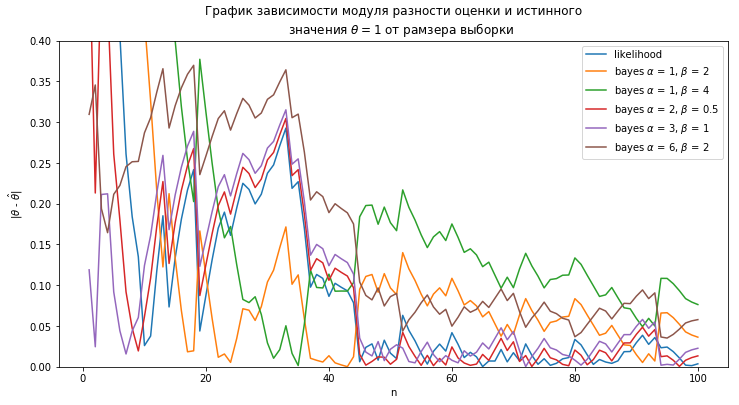

In [37]:
sample = norm_rv.rvs(N)
create_plot(sample)

Вывод: Как видно из первого графика, существуют такие параметры $\alpha$ и $\beta$, что для них байесовская оценка ведет себя лучше, чем оценка максимального правдоподобия. Тем не менее, на другой выборке (второй график) данные оценки могут дать хуже результат, чем оценка максимального правдоподобия. Но все из данных оценок дают довольно неплохой результат и абсолютное отклонение оценки от истинного значения близко к нулю. Таким образом, байесовские оценки также могут быть использованы в качестве оценки параметра, но при разных выборках они могут вести себя, как и хуже, так и лучше, чем оценка максимального правдоподобия.